In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../../datasets/parsed_malt_data.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,location,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date
0,Mickael M.,https://dam.malt.com/ecrimpl92gqieb0ijvjo?grav...,Graphiste,-,250,1.00,Quelques jours,['Graphiste'],"['Wordpress', 'Design logo', 'Affiche', 'Carte...",0,"{'Localisation': '21000 Dijon, France'}","Passionné depuis mon enfance par le graphisme,...",0,0,0,mickaelmolina,https://www.malt.fr/profile/mickaelmolina,2013-08-02
1,Nacera TIZI,https://dam.malt.com/erokb7omnnhmf79bojnr?grav...,Commerciale Freelance,-,40,NaN,1h,['Business developers'],['Tanger et tout le Maroc'],0,"{'Localisation': 'Tanger, Tanger-Tétouan, Maroc'}",Parce que La ville de Tanger tend à devenir l'...,0,0,0,naceratizi,https://www.malt.fr/profile/naceratizi,2014-02-22
2,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,"{'Localisation': 'La Rochelle, France'}",SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06
3,Youri Galescot,https://dam.malt.com/r3nb6gaf6723bi1unhhx?grav...,Développeur web frontend et backend,-,235,0.33,12h,[],"['PHP', 'HTML5', 'CSS3', 'SEO', 'jQuery', 'Res...",0,"{'Localisation': 'Paris, France'}","Bonjour,Je suis développeur frontend et backen...",0,0,0,yourigalescot,https://www.malt.fr/profile/yourigalescot,2014-02-18
4,Julien Trezeux,https://dam.malt.com/pllhwpaapz84yfqmc7rw?grav...,directeur artistique - graphiste - illustrateur,8-15,350,1.00,1h,"['Photographe', 'Graphiste', 'Illustrateur']","['Direction artistique', 'Graphisme', 'Design ...",0,"{'Localisation': 'Paris, France / www.graphicf...","Graphiste et directeur artistique depuis 2007,...",3,0,0,julientrezeux,https://www.malt.fr/profile/julientrezeux,2014-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193171,Lydia Ronné,https://dam.malt.com/0ab661d5-23a2-4a9a-a3a7-2...,assistante virtuelle,15et+,200,1.00,1h,['Planneur Stratégique'],"['Construction', 'Commerce de gros', 'Services...",0,"{'Localisation': 'Choisy-le-Roi, France'}",Je suis spécialisée dans l'assistance et le co...,0,0,0,lydiaronne,https://www.malt.fr/profile/lydiaronne,2023-10-12
193172,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,"{'Localisation': 'Lille, France'}",Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01
193173,Tony Marando,https://dam.malt.com/d2b7425b-8633-4c1c-8e3b-f...,Traducteur,0-2,125,1.00,1h,"['Community Manager', 'Traducteur']","['Traduction Français Anglais', 'Traduction An...",0,"{'Localisation': 'Collonges-sous-Salève, France'}",Hello !Je suis Tony et l’admin du groupe Plans...,0,0,0,tonymarando,https://www.malt.fr/profile/tonymarando,2023-10-26
193174,Matthieu Sager,https://dam.malt.com/c7e64455-efbf-4ec7-ad3e-1...,Ingénieur système,3-7,450,1.00,1h,['Designer Produit Industriel'],"['Industrie électrique', 'Environnement et dév...",0,"{'Localisation': 'Poitiers, France'}",Fort de mes 5 années d'expérience dans le déve...,0,0,0,matthieusager,https://www.malt.fr/profile/matthieusager,2023-10-14


### Number of freelancers through time

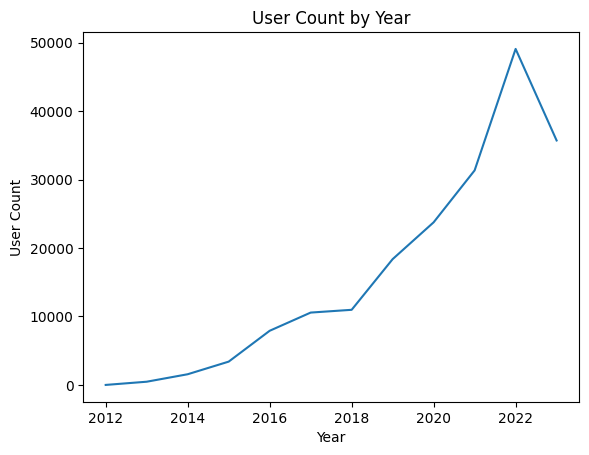

In [2]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

# get only the year from the date
df['year'] = df['creation_date'].dt.year.astype(str).str[:4]

occurences = df['year'].value_counts()

occurences = occurences.sort_index()

vis = occurences.plot()

# create a new figure
vis.plot()

# add a title and labels
plt.title('User Count by Year')
plt.xlabel('Year')
plt.ylabel('User Count')

# show the plot
plt.show()

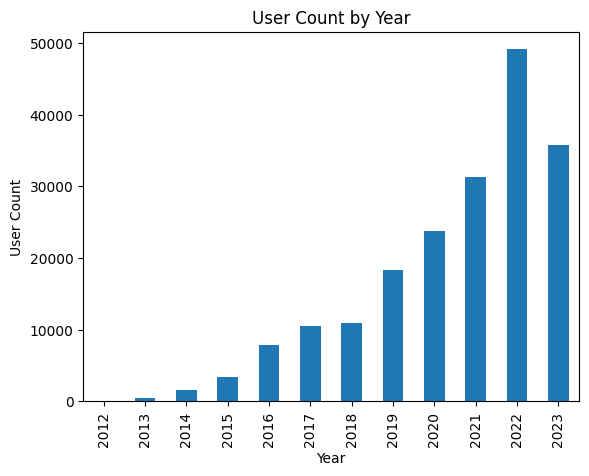

In [3]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

df['year'] = df['creation_date'].dt.year.astype(str).str[:4]

# Compter le nombre d'occurrences pour chaque année
occurrences = df['year'].value_counts()

# sort data by year
occurrences = occurrences.sort_index()

# bar plot
occurrences.plot(kind='bar')

# add a title and labels
plt.title('User Count by Year')
plt.xlabel('Year')
plt.ylabel('User Count')

# plot the data
plt.show()

### Number of supermalter in comparison to malter (barplot) > deduce the percentage of supermalter

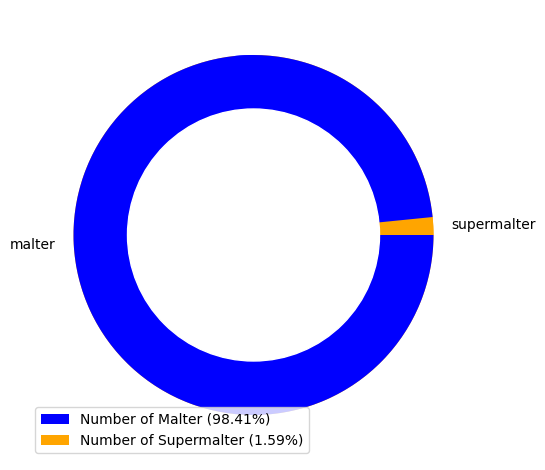

In [4]:
# Filter the occurrences for 'supermalter' and 'malter'
supermalter_count = df['supermalter'] == 1
malter_count = df['supermalter'] == 0

# Create a new dataframe with the counts
comparison_df = [supermalter_count.sum(), malter_count.sum()]

# calculate percentage of supermalter and malter and round to 2 decimals
supermalter_percentage = supermalter_count.sum() / df.shape[0] * 100
malter_percentage = malter_count.sum() / df.shape[0] * 100
supermalter_percentage = round(supermalter_percentage, 2)
malter_percentage = round(malter_percentage, 2)

# create data
names = ['supermalter', 'malter']

sizes = [supermalter_percentage, malter_percentage]

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.7, color='white')

labels = ['Number of Malter ('+str(malter_percentage)+'%)', 'Number of Supermalter ('+str(supermalter_percentage)+'%)']
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

# Give color names
plt.pie(comparison_df, labels=names, colors=['orange','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout()

# Show the graph
plt.show()

### Number of missions done by malter vs supermalter

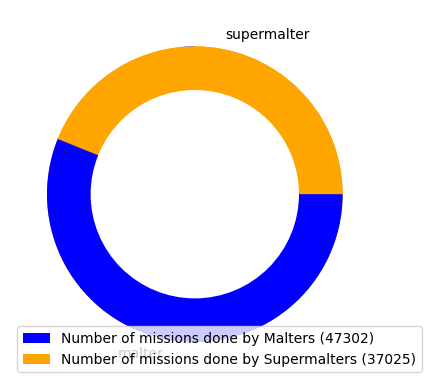

In [5]:
# Filter the occurrences for 'supermalter' and 'malter'
df_supermalter = df[df['supermalter'] == 1]
df_malter = df[df['supermalter'] == 0]

# Create a new dataframe with the counts
supermalter_mission_count = df_supermalter['missions'].sum()
malter_mission_count = df_malter['missions'].sum()

comparison_df = [supermalter_mission_count, malter_mission_count]

# create data
names = ['supermalter', 'malter']

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.7, color='white')

labels = ['Number of missions done by Malters ('+str(malter_mission_count)+')', 'Number of missions done by Supermalters ('+str(supermalter_mission_count)+')']
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")


# Give color names
plt.pie(comparison_df, labels=names, colors=['orange','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()